In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_train=pd.read_csv("../assignment_datasets/Regression_Data/Train.csv")
data_test=pd.read_csv("../assignment_datasets/Regression_Data/Test.csv")
print(data_test.shape)
print(data_train.shape)

(400, 6)
(1600, 6)


In [4]:
data_train[:10]

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
5,-1.055329,-0.874807,0.580753,-0.773541,1.070888,-122.405263
6,-0.824707,0.499427,1.293281,-0.240671,-0.419136,1.413741
7,-1.936602,0.583708,-0.521135,-0.631724,-1.030729,-13.306543
8,0.647431,-0.265401,0.327080,0.457829,-1.757592,-25.754698
9,-1.133029,-0.839132,-0.547809,0.551768,-0.639173,-57.077754


In [5]:
X_train=np.array(data_train)
X_test=np.array(data_test)
Y_train=X_train[:,X_train.shape[1]-1]
Y_test=X_test[:,X_test.shape[1]-1]
X_train=X_train[:,:X_train.shape[1]-1]
X_test=X_test[:,:X_test.shape[1]-1]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(1600, 5)
(400, 5)
(1600,)
(400,)


In [6]:
a = np.array([[1],[2],[3]])
b= np.array([[4],[5],[6]])
c=np.hstack((a,b))
d=np.hstack((c,b))
print(c.shape,b.shape)
print(c)
print(d)
a.shape

(3, 2) (3, 1)
[[1 4]
 [2 5]
 [3 6]]
[[1 4 4]
 [2 5 5]
 [3 6 6]]


(3, 1)

In [7]:
theta=np.ones((1+X_train.shape[1],))
print(theta.shape)
print(theta[1])
ones=np.ones((X_train.shape[0],1))#most important line for stacking
print(ones.shape)
X=X_train[:,0]
print(X.shape)
X=np.hstack((ones,X_train))
print(X)
print(np.dot(theta,X[1,:]))

(6,)
1.0
(1600, 1)
(1600,)
[[ 1.          0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [ 1.         -0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 1.          0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.          1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [ 1.         -1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [ 1.         -1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]
-1.2575491301892177


In [43]:
def hypothesis(theta,x):
    return np.dot(theta,x)
def gradient(hyp,y,x):
    return (hyp-y)*x
def gradientdescent(X,Y,learning_rate=0.00005):
    theta=np.zeros((1+X.shape[1],))
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    err=[]
    #hyp=hypothesis(theta,x)
    prev_error=0
    error=1
    while(abs(prev_error-error)>0.9):
        prev_error=error
        error=[]
        for i in range(X.shape[0]):
            hyp=hypothesis(theta,X[i,:])
            for j in range(X.shape[1]):
                #print(gradient(hyp,Y[i],X[i,j]))
                theta[j] = theta[j] -learning_rate*gradient(hyp,Y[i],X[i,j])
            error.append((hypothesis(theta,X[i,:])-Y[i])**2)
        error=np.array(error)
        error=error.sum()
        err.append(error)
    err=np.array(err)
    return theta,err
def prediction(test_x,theta):
    ones=np.ones((1,))
    #print(ones.shape,test_x.shape)
    test_x=np.hstack((ones,test_x))
    #print(ones.shape,test_x.shape)
    pred=hypothesis(theta,test_x)
    return pred

In [222]:
def batchgradientdescent(X,Y,batches=10,learning_rate=0.00005):
    theta=np.zeros((1+X.shape[1],))
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    err=1
    #hyp=hypothesis(theta,x)
    prev_error=0
    batch_size=X.shape[0]/batches
    batch_size=int(batch_size)
    m=X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    k=0
    error=[]
    while(abs(prev_error-err)>=1):
        prev_error=err
        for b in range(batches):
            indexes = indices[b*batch_size:(b+1)*batch_size]
            err=[]
            for i in indexes:
                hyp=hypothesis(theta,X[i,:])
                for j in range(X.shape[1]):
                    #print(gradient(hyp,Y[i],X[i,j]))
                    theta[j] = theta[j] -learning_rate*gradient(hyp,Y[i],X[i,j])
                err.append((hypothesis(theta,X[i,:])-Y[i])**2)
            err=np.array(err)
            err=err.sum()
            error.append(err)
    error=np.array(error)
    return theta,error

In [211]:
def score(X,Y):
    ss_tot=0
    ss_res=0
    theta,_=gradientdescent(X,Y)
    for i in range(Y.shape[0]):
        y=prediction(X[i],theta)
        ss_res=ss_res+(y-Y[i])**2
        ss_tot=ss_tot+(y-y_mean)**2
    return 1-ss_res/ss_tot
def score_mini_batch(X,Y):
    ss_tot=0
    ss_res=0
    theta,_=batchgradientdescent(X,Y)
    for i in range(Y.shape[0]):
        y=prediction(X[i],theta)
        ss_res=ss_res+(y-Y[i])**2
        ss_tot=ss_tot+(y-y_mean)**2
    return 1-ss_res/ss_tot

In [210]:
#plt.plot(range(200),gradientdescent(X_train,Y_train))
print("Testing score:{0:.4f}".format(score(X_test,Y_test)))
print("Training scores:{0:.4f}".format(score(X_train,Y_train)))


Testing score:0.9684
Training scores:0.9649


[ 4.95866805 29.68734336 92.63296358  8.24942383 44.7262016   2.5204977 ]


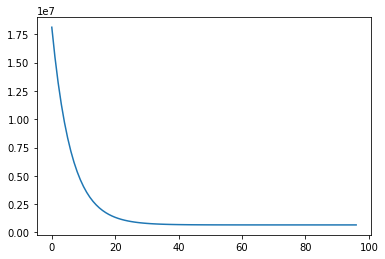

In [123]:
theta,error=gradientdescent(X_train,Y_train)
print(theta)
plt.plot(range(error.shape[0]),error)

In [101]:
# Value of coefficient, hypothesis and intercept
theta,_=gradientdescent(X_train,Y_train)
intercept=theta[0]
theta=theta[1:]
print("Intercept is:{0:.3f}".format(intercept))
print("Theta is {}".format(theta))

Intercept is:4.959
Theta is [29.68734336 92.63296358  8.24942383 44.7262016   2.5204977 ]


[ 4.96912224 29.68988785 92.66018983  8.26425036 44.74812807  2.5274818 ]


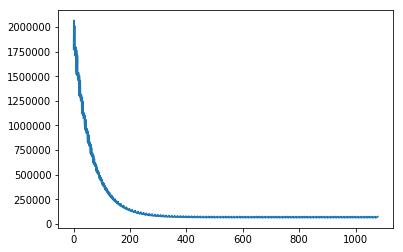

In [223]:
theta,error=batchgradientdescent(X_train,Y_train)
print(theta)
plt.plot(range(error.shape[0]),error)

In [224]:
print("Testing score:{0:.4f}".format(score_mini_batch(X_test,Y_test)))
print("Training scores:{0:.4f}".format(score_mini_batch(X_train,Y_train)))

Testing score:0.9666
Training scores:0.9638
